## Aufgabe 1)

In [156]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

### (1) Daten einlesen

In [157]:
with open("../Daten/pagerank2.txt", "r") as file:
    data = [line.rstrip() for line in file]

In [158]:
nodes = [int(n) for n in data[0].split(";")]

In [159]:
edges = data[1].split(";")


In [160]:
node_edges_dict = {}

for n, e in zip(nodes, edges):
    edges = [int(s) for s in e.split(",") if s]
    if not edges:
        edges = [n]
    node_edges_dict[n] = edges


### (3) Graphen erzeugen

In [161]:
G = nx.DiGraph()
for n in node_edges_dict:
    G.add_node(n)
    for e in node_edges_dict[n]:
        G.add_edge(n , e)
     

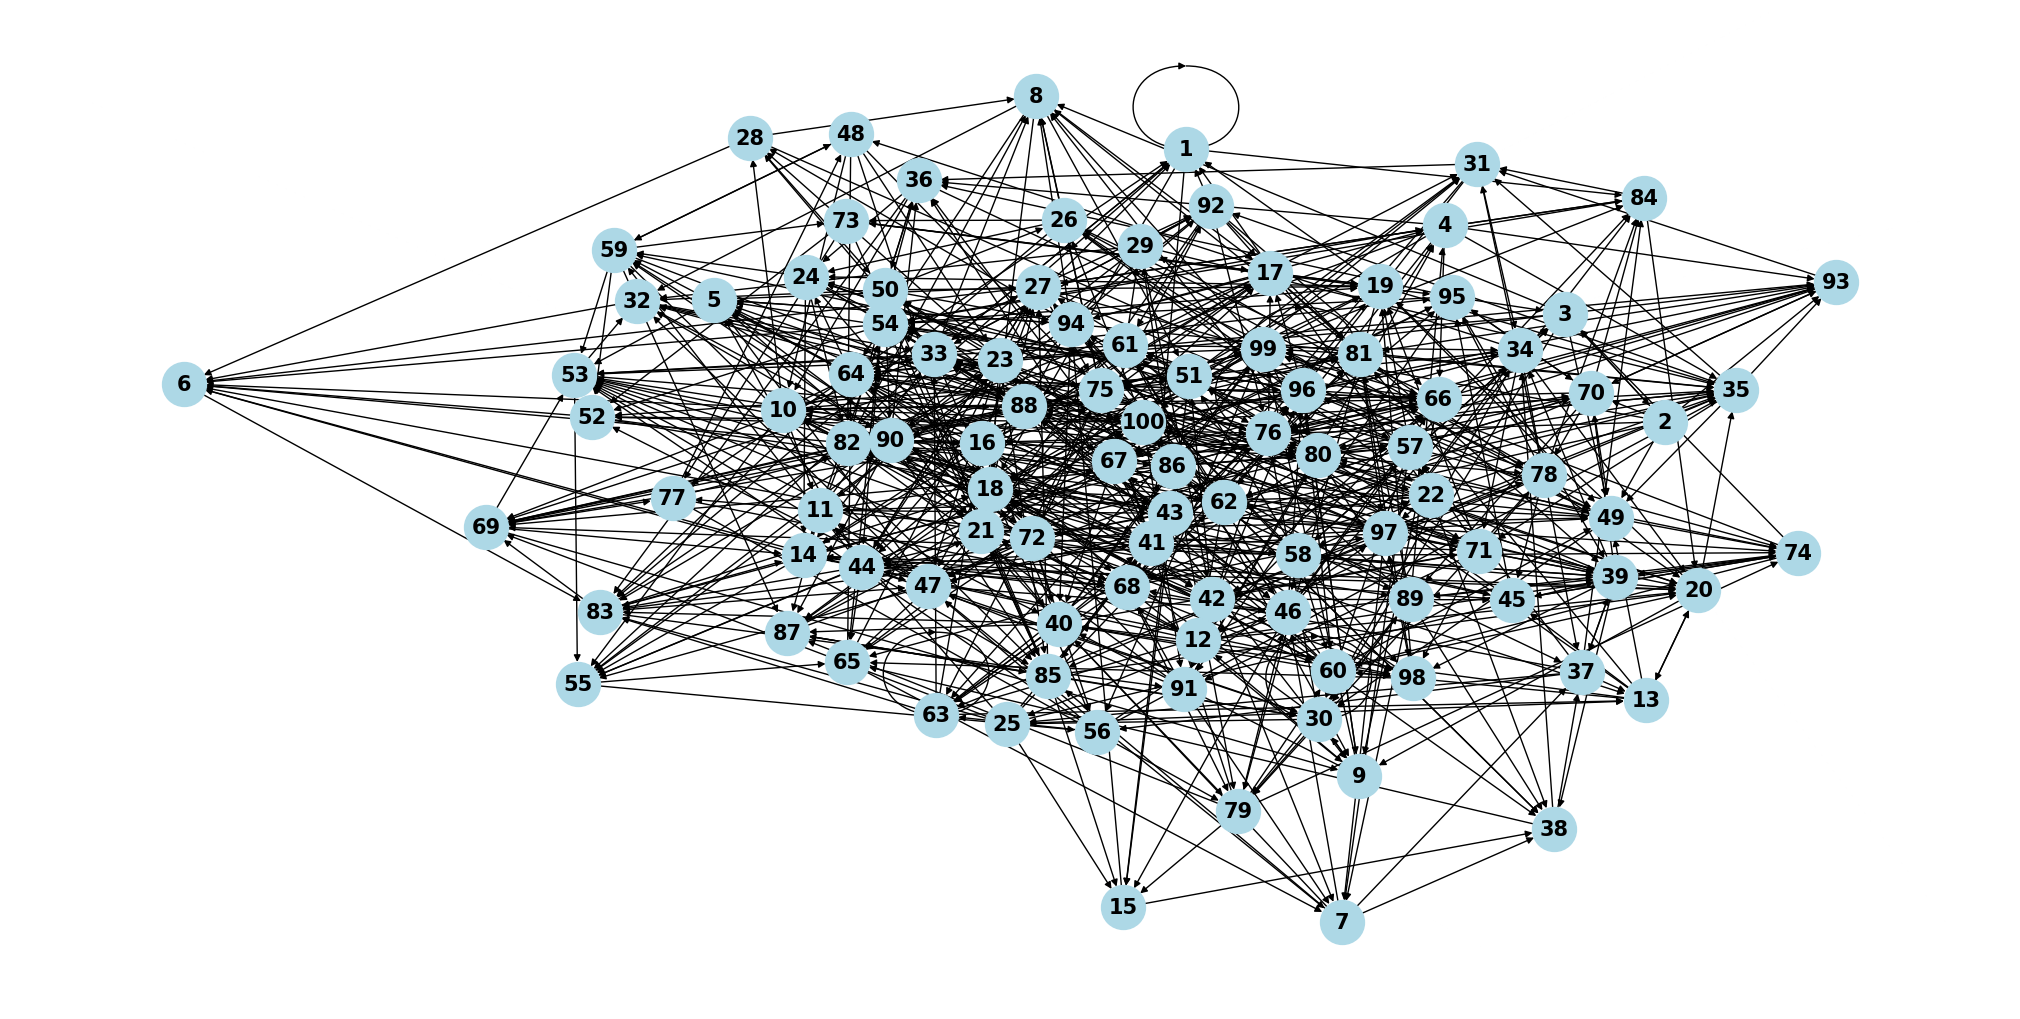

In [162]:
plt.figure(figsize=(20, 10))
nx.draw(G, with_labels=True, node_color='lightblue', 
        node_size=1000, font_size=15, font_weight='bold',
        arrows=True)
plt.show()

#### Adjazenzmatrix A

In [163]:
A = nx.adjacency_matrix(G).todense()

### Übergangsmatrix P

In [164]:
P = np.array(A, dtype=float)

row_sums = P.sum(axis=1)
P = np.divide(P, row_sums, where=row_sums != 0)

In [168]:
p0 = np.ones(n) / n
p0

array([0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01])

## ChatGPT

In [173]:
import networkx as nx
import numpy as np

lines = [
    "1;2;3;4;5",
    "3,4;1;1,5;;1,2,3,4,5"
]

with open("../Daten/pagerank2.txt", "r") as file:
    data = [line.rstrip() for line in file]
    
nodes = data[0].split(';')
edges = data[1].split(';')

N = 150  # Number of steps
eta = 0.9  # Teleporting probability

G = nx.DiGraph()

for node in nodes:
    G.add_node(node)

for idx, edge in enumerate(edges):
    from_node = nodes[idx]
    if edge:
        to_nodes = edge.split(',')
        for to_node in to_nodes:
            G.add_edge(from_node, to_node)
    else:
        G.add_edge(from_node, from_node)

A = nx.adjacency_matrix(G, nodelist=nodes).toarray()
P = A / A.sum(axis=1, keepdims=True)

n = len(nodes)
p0 = np.full((n,), 1/n)

p = p0
for _ in range(N):
    p = p @ P

E = np.full((n, n), 1/n)

G_matrix = eta * P + (1 - eta) * E

p_teleport = p0
for _ in range(N):
    p_teleport = p_teleport @ G_matrix

node_ranking_no_teleport = np.argsort(-p)
node_ranking_with_teleport = np.argsort(-p_teleport)

nodes_array = np.array(nodes)
rank_no_teleport = nodes_array[node_ranking_no_teleport]
rank_with_teleport = nodes_array[node_ranking_with_teleport]

print("ohne Teleporting:", rank_no_teleport)
print("mit Teleporting:", rank_with_teleport)


ohne Teleporting: ['76' '49' '83' '35' '30' '19' '82' '96' '17' '100' '64' '18' '47' '20'
 '6' '66' '9' '14' '85' '40' '34' '27' '33' '65' '53' '98' '75' '24' '87'
 '21' '88' '8' '32' '41' '60' '93' '38' '99' '54' '79' '71' '31' '67' '69'
 '39' '80' '37' '91' '74' '81' '46' '7' '94' '68' '36' '55' '26' '84' '1'
 '63' '97' '13' '57' '5' '95' '52' '78' '10' '50' '89' '59' '90' '70' '43'
 '51' '15' '92' '56' '44' '62' '45' '4' '23' '73' '12' '77' '61' '3' '25'
 '86' '42' '16' '22' '11' '48' '28' '72' '58' '29' '2']
mit Teleporting: ['76' '49' '83' '35' '30' '19' '82' '96' '64' '100' '17' '18' '20' '47'
 '66' '6' '9' '14' '85' '40' '27' '53' '34' '33' '65' '75' '98' '21' '87'
 '24' '88' '8' '32' '38' '60' '41' '93' '99' '31' '79' '54' '71' '69' '39'
 '67' '80' '74' '37' '46' '81' '94' '68' '7' '91' '36' '55' '84' '26' '63'
 '1' '97' '57' '13' '95' '5' '10' '50' '52' '78' '70' '59' '90' '51' '89'
 '43' '15' '92' '44' '56' '62' '45' '23' '4' '12' '77' '73' '61' '3' '25'
 '42' '86' '16' '48' 